# Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

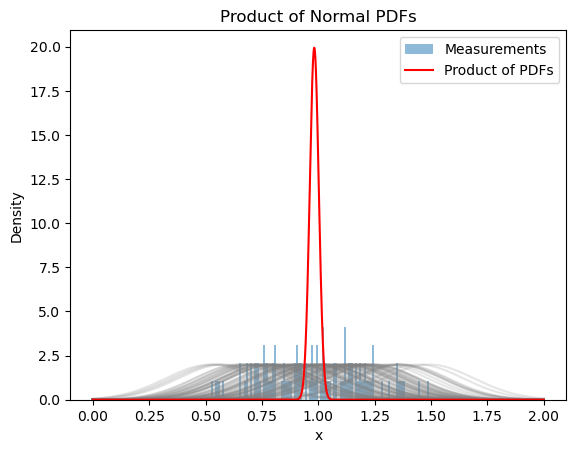

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# Generate measurements
measurements = [random.gauss(1, 0.2) for _ in range(100)]

# Histogram of measurements
plt.hist(measurements, bins=100, density=True, alpha=0.5, label='Measurements')

# Define x-axis
x = np.linspace(0, 2, 10000)

# Compute product of all normal PDFs
pdf_product = np.ones_like(x)
for mu in measurements:
    pdf_product *= norm(mu, 0.2).pdf(x)

# Normalize the product for visualization (optional)
pdf_product /= np.trapz(pdf_product, x)  # Area under curve ≈ 1

# Plot individual PDFs (optional)
for mu in measurements:
    plt.plot(x, norm(mu, 0.2).pdf(x), alpha=0.2, color='gray')

# Plot product
plt.plot(x, pdf_product, label='Product of PDFs', color='red')
plt.legend()
plt.title("Product of Normal PDFs")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

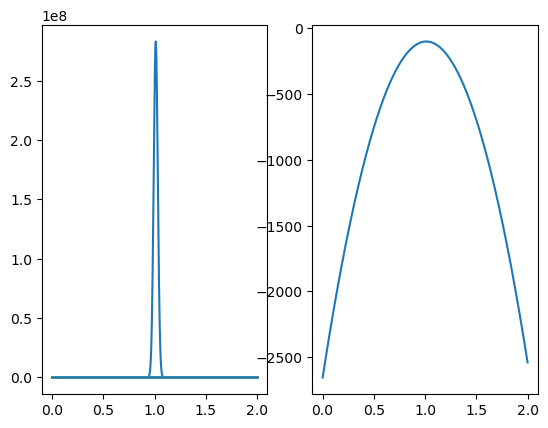

numerical MLE for the true value is:  1.0115011501150115
analytical MLE for the true value is:  1.011438098823754


In [35]:
# MLE approach to get the best estimation on mu

x = np.linspace(0,2,10000)

# we do the product of the 4 gaussians

# computes the product of the likelihood for all measurements. The likelihood function for a Gaussian distribution 
# is calculated for each measurement given the current values of mu_parameter and sigma_parameter

def likelihood_gaus(measurements, mu, sigma):
    L = 1.
    for x in measurements: L = L*norm(mu,sigma).pdf(x) #gaussian_probability(x,mu_parameter, sigma_parameter)
    return L

def log_likelihood_gaus(measurements, mu, sigma): #is it usefull to use this? 
    log_L = 0
    for x in measurements: log_L += -((x-mu)/sigma)**2
    return log_L 

likelihood_gaus = likelihood_gaus(measurements, x, 0.2)
log_likelihood_gaus = log_likelihood_gaus(measurements, x, 0.2)

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, likelihood_gaus)

for x_i in measurements: 
    ax1.plot(x,norm(x_i,0.2).pdf(x))

ax2.plot(x, log_likelihood_gaus)
plt.show()

#to find the maximum likelihood estimator NUMERICALLY
max_index = np.argsort(log_likelihood_gaus)[::-1][0] 
mu = x[max_index]
print("numerical MLE for the true value is: ",mu) 

#we can compare it with the mean (ANALYTICAL MLE):
print("analytical MLE for the true value is: ",np.mean(measurements)) 

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 


## Fisher information matrix

The ***asymptotic normality of MLE*** is invoked to approximate the likelihood function as a Gaussian (or the $\ln L$ as a parabola), i.e. we take a Taylor expansion around the MLE, keep terms up $2^\mathrm{nd}$ order, then *define* the uncertainty on our model parameters as:

$$\sigma_{jk} = \sqrt{[F^{-1}]_{jk}}, $$

where

$$ F_{jk} = - \frac{d^2 \ln L}{d\theta_j d\theta_k} \Biggr\rvert_{\theta=\hat \theta}.$$

The matrix $F$ is known as the **Fisher information matrix**.  The elements $\sigma^2_{jk}$ are known as the ***covariance matrix***.


In [36]:
#to find the error we use Fisher matrix
#we need second derivative of log_L computed in the real value estimator computed above

dx = np.diff(x)[0]
der_log_L = np.diff(log_likelihood_gaus)/dx   # derivative of function log_L
der2_log_L = np.diff(der_log_L)/dx            # second derivative of function log L
F_11 = -der2_log_L[max_index]                 # element of Fisher matrix
sigma_mu = np.sqrt(1/F_11)
print("numerical MLE for the UNCERTANTY on mu is: ",sigma_mu) 
#we can compare it with the mean (ANALYTICAL MLE):
print("analytical MLE for the uncertanty on mu is: ",0.2/np.sqrt(N)) 

numerical MLE for the UNCERTANTY on mu is:  0.014142135622509624
analytical MLE for the uncertanty on mu is:  0.02


### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

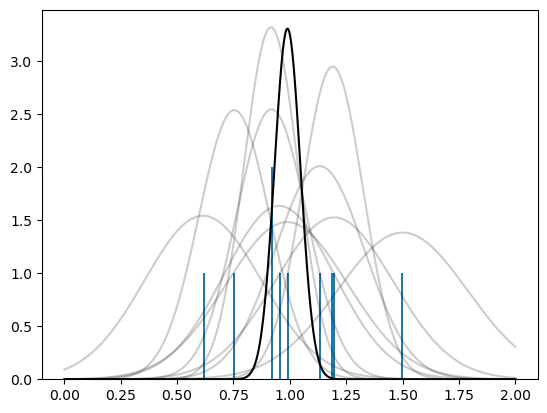

numerical MLE for the true value is:  0.9894989498949895
analytical MLE for the true value is:  0.9894386070365999


In [29]:
N = 10 
#numbers of measurements with the telescope: each measurment consists of one data from underlying
# gaussian distribution with some sigma. 

# HETEROSCEDASTIC GAUSSIAN

errors = []
for i in range(N):
    errors.append(random.gauss(0.2,0.05)) #errors from a given distribution with mu=0.2, sigma=0.05


measurements = []
for i in range(N):
    measurements.append(random.gauss(1,errors[i])) #numbers from a given distribution with mu=1, sigma=0.2
    
plt.hist(measurements,100) #density=True

for i in range(N): plt.plot(x,norm(measurements[i],errors[i]).pdf(x),c='black',alpha=0.2)


Ls = np.array([norm.pdf(x,loc=s,scale=ss) for s,ss in zip(measurements,errors)])

L = np.prod(Ls,axis=0)

plt.plot(x,L,c='black',linestyle='-',label="single measurements")


plt.show()

#to find the maximum likelihood estimator NUMERICALLY
max_index = np.argsort(L)[::-1][0] 
mu = x[max_index]
print("numerical MLE for the true value is: ",mu) 

#we can compare it with the mean (ANALYTICAL MLE):
measurements = np.array(measurements)
errors = np.array(errors)
mu_analytic = np.sum(measurements / errors**2) / np.sum(1 / errors**2)
print("analytical MLE for the true value is: ",mu_analytic) 

In [31]:
sigma_mu = np.diff(np.log(L), n=2)
sigma_mu /= (np.diff(x)[0])**2
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)[max_index] #Evaluate at the ML

print("Fisher matrix error on estimated mean is %.3f" % sigma_mu)

# Analytic formula for error for heteroscedastic gaussian:
sigma_mu_analytic = np.sum(1/errors**2)**(-1/2)
print("analytical uncertainty for the estimated mean is: ",sigma_mu_analytic) 


Fisher matrix error on estimated mean is 0.057
analytical uncertainty for the estimated mean is:  0.05744371637246238
